In [ ]:
### 차원축소

# 고차원데이터(변수가 많은, 칼럼이 많은)의 경우, 학습이 어려울 수 있다(과적합), 연산하는데
# 비용이 많이든다.. 시각화가 어렵다..

# 고차원데이터 => 저차원으로 변형..

# 학습이 효율적이다
# 학습에 비용이 적게 든다(메모리, 시간)
# 시각화해서 분석이 용이하다

# PCA, LDA, t-sne...

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import load_digits
digits = load_digits()

In [3]:
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [4]:
x = digits.data
y = digits.target

In [5]:
x.shape

(1797, 64)

In [7]:
x[10].reshape(8,8)

array([[ 0.,  0.,  1.,  9., 15., 11.,  0.,  0.],
       [ 0.,  0., 11., 16.,  8., 14.,  6.,  0.],
       [ 0.,  2., 16., 10.,  0.,  9.,  9.,  0.],
       [ 0.,  1., 16.,  4.,  0.,  8.,  8.,  0.],
       [ 0.,  4., 16.,  4.,  0.,  8.,  8.,  0.],
       [ 0.,  1., 16.,  5.,  1., 11.,  3.,  0.],
       [ 0.,  0., 12., 12., 10., 10.,  0.,  0.],
       [ 0.,  0.,  1., 10., 13.,  3.,  0.,  0.]])

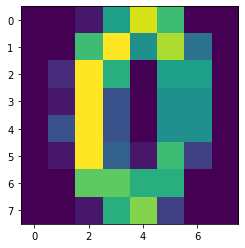

In [8]:
plt.imshow(x[10].reshape(8,8))

In [9]:
y[10]

0

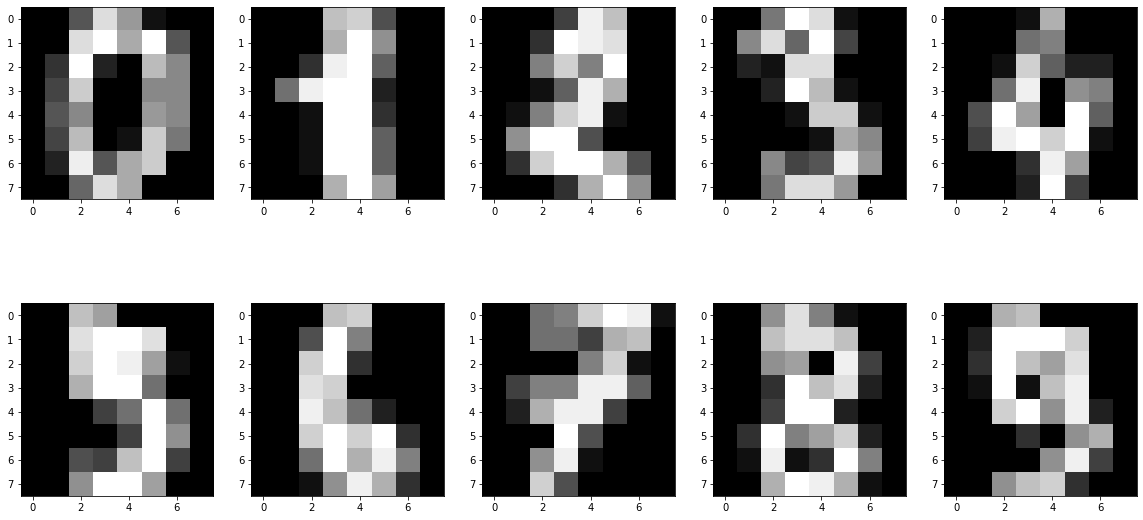

In [13]:
samples = x[:10].reshape(10, 8,8)
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20,10))
for idx, sample in enumerate(samples):
    axes[idx//5, idx%5].imshow(sample, cmap='gray')

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_x = scaler.fit_transform(x)

In [22]:
scaled_x

array([[ 0.        , -0.33501649, -0.04308102, ..., -1.14664746,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  0.54856067,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  1.56568555,
         1.6951369 , -0.19600752],
       ...,
       [ 0.        , -0.33501649, -0.88456568, ..., -0.12952258,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -0.67419451, ...,  0.8876023 ,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649,  1.00877481, ...,  0.8876023 ,
        -0.26113572, -0.19600752]])

In [23]:
scaled_x.shape

(1797, 64)

In [24]:
from sklearn.decomposition import PCA
pca = PCA()

In [26]:
pca.fit(scaled_x)

PCA()

In [28]:
# 설명된 분산..
# 64차원 데이터 => 64개의 주성분 생성
# 각 주성분이 설명해주는 데이터 분산의 크기..

len(pca.explained_variance_)

64

In [29]:
# 설명된 분산..

pca.explained_variance_

array([7.34477606e+00, 5.83549054e+00, 5.15396118e+00, 3.96623597e+00,
       2.96634520e+00, 2.57204442e+00, 2.40600941e+00, 2.06867355e+00,
       1.82993314e+00, 1.78951739e+00, 1.69784616e+00, 1.57287889e+00,
       1.38870781e+00, 1.35933609e+00, 1.32152536e+00, 1.16829176e+00,
       1.08368678e+00, 9.99778617e-01, 9.74382931e-01, 9.08912418e-01,
       8.22719264e-01, 7.76310139e-01, 7.11556753e-01, 6.45523648e-01,
       5.95273988e-01, 5.76501797e-01, 5.26731552e-01, 5.10636301e-01,
       4.86863813e-01, 4.55601071e-01, 4.42851552e-01, 4.22300863e-01,
       3.99106303e-01, 3.91101111e-01, 3.60945168e-01, 3.48603059e-01,
       3.19596300e-01, 2.94066271e-01, 2.76922851e-01, 2.58273004e-01,
       2.47830286e-01, 2.42356600e-01, 2.17581996e-01, 2.07995927e-01,
       2.00090902e-01, 1.89835165e-01, 1.76128942e-01, 1.68752359e-01,
       1.58184741e-01, 1.43114274e-01, 1.33210813e-01, 1.24263708e-01,
       1.19328984e-01, 1.11886547e-01, 1.02504338e-01, 9.84087608e-02,
      

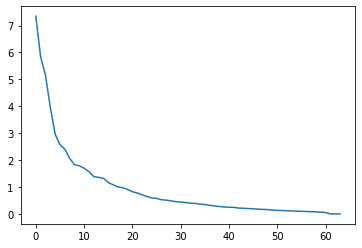

In [30]:
plt.plot(pca.explained_variance_)

In [31]:
pca.explained_variance_ratio_

array([1.20339161e-01, 9.56105440e-02, 8.44441489e-02, 6.49840791e-02,
       4.86015488e-02, 4.21411987e-02, 3.94208280e-02, 3.38938092e-02,
       2.99822101e-02, 2.93200255e-02, 2.78180546e-02, 2.57705509e-02,
       2.27530332e-02, 2.22717974e-02, 2.16522943e-02, 1.91416661e-02,
       1.77554709e-02, 1.63806927e-02, 1.59646017e-02, 1.48919119e-02,
       1.34796957e-02, 1.27193137e-02, 1.16583735e-02, 1.05764660e-02,
       9.75315947e-03, 9.44558990e-03, 8.63013827e-03, 8.36642854e-03,
       7.97693248e-03, 7.46471371e-03, 7.25582151e-03, 6.91911245e-03,
       6.53908536e-03, 6.40792574e-03, 5.91384112e-03, 5.71162405e-03,
       5.23636803e-03, 4.81807586e-03, 4.53719260e-03, 4.23162753e-03,
       4.06053070e-03, 3.97084808e-03, 3.56493303e-03, 3.40787181e-03,
       3.27835335e-03, 3.11032007e-03, 2.88575294e-03, 2.76489264e-03,
       2.59174941e-03, 2.34483006e-03, 2.18256858e-03, 2.03597635e-03,
       1.95512426e-03, 1.83318499e-03, 1.67946387e-03, 1.61236062e-03,
      

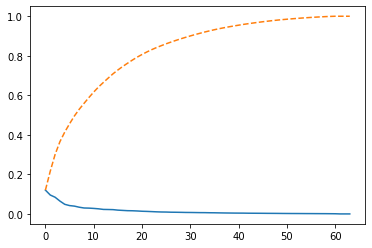

In [35]:
plt.plot(pca.explained_variance_ratio_)
plt.plot(pca.explained_variance_ratio_.cumsum(), linestyle='--')

In [ ]:
# 실제 사용 - n개의 주성분..

# 전체 주성분의 값을 사용하지 않음..
# 주성분의 개수를 지정하거나 설명되는 분산의 비율값을 사용함..

In [36]:
# 데이터의 분산의 80%까지 표현하는 주성분을 리턴..
ratio_pca = PCA(n_components=0.8)
ratio_pca.fit(scaled_x)

PCA(n_components=0.8)

In [37]:
ratio_pca.explained_variance_ratio_

array([0.12033916, 0.09561054, 0.08444415, 0.06498408, 0.04860155,
       0.0421412 , 0.03942083, 0.03389381, 0.02998221, 0.02932003,
       0.02781805, 0.02577055, 0.02275303, 0.0222718 , 0.02165229,
       0.01914167, 0.01775547, 0.01638069, 0.0159646 , 0.01489191,
       0.0134797 ])

In [38]:
ratio_pca.explained_variance_ratio_.cumsum()

array([0.12033916, 0.21594971, 0.30039385, 0.36537793, 0.41397948,
       0.45612068, 0.49554151, 0.52943532, 0.55941753, 0.58873755,
       0.61655561, 0.64232616, 0.66507919, 0.68735099, 0.70900328,
       0.72814495, 0.74590042, 0.76228111, 0.77824572, 0.79313763,
       0.80661732])

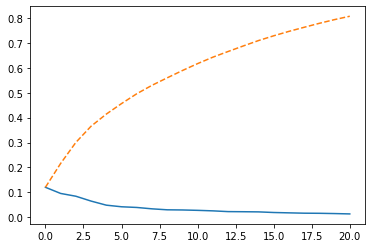

In [39]:
plt.plot(ratio_pca.explained_variance_ratio_)
plt.plot(ratio_pca.explained_variance_ratio_.cumsum(), linestyle='--')

In [40]:
ratio_pca.n_components_

21

In [41]:
# n개의 주성분을 사용..

In [42]:
n_comp_pca = PCA(n_components=8)
n_comp_pca.fit(scaled_x)

PCA(n_components=8)

In [44]:
n_comp_pca.explained_variance_ratio_

array([0.12033916, 0.09561053, 0.08444411, 0.06498348, 0.04859982,
       0.04213462, 0.03940133, 0.03386796])

In [45]:
n_comp_pca.explained_variance_ratio_.cumsum()

array([0.12033916, 0.21594969, 0.3003938 , 0.36537729, 0.4139771 ,
       0.45611172, 0.49551305, 0.52938101])

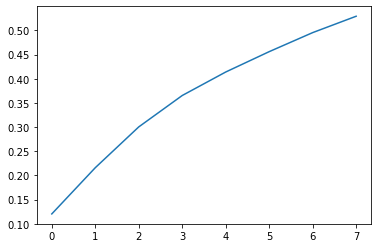

In [46]:
plt.plot(n_comp_pca.explained_variance_ratio_.cumsum())

In [ ]:
# 시각화 : 2차원 또는 3차원 데이터까지 가능..
# 64차원 scaled_x data를 2 차원 데이터로 차원을 축소해서 시각화하기..

In [51]:
n_comp_pca = PCA(n_components = 2)
viz_pca_latent = n_comp_pca.fit_transform(scaled_x)
viz_pca_latent

array([[ 1.91421439, -0.95450389],
       [ 0.58896856,  0.92461898],
       [ 1.30207434, -0.31710748],
       ...,
       [ 1.02262134, -0.14787377],
       [ 1.07603269, -0.38095879],
       [-1.25769068, -2.22758604]])

In [57]:
y

array([0, 1, 2, ..., 8, 9, 8])

In [58]:
def visualize_latent_space_with_label(latent):
    for label in np.unique(y):
        index = y == label
        comp_x = latent[index, 0]
        comp_y = latent[index, 1]
        plt.scatter(comp_x, comp_y)#, c='{}'.format(label), label=label)
    plt.legend()

No handles with labels found to put in legend.


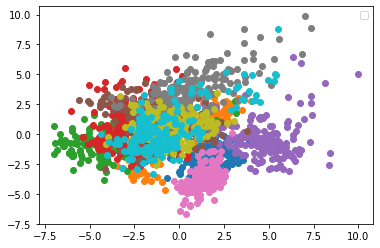

In [59]:
visualize_latent_space_with_label(viz_pca_latent)

In [62]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [63]:
rfc = RandomForestClassifier()

x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=111)

rfc.fit(x_train, y_train)
rfc.score(x_test, y_test)

0.9688888888888889

In [64]:
rfc = RandomForestClassifier()

x_train, x_test, y_train, y_test = train_test_split(viz_pca_latent,y, random_state=111)

rfc.fit(x_train, y_train)
rfc.score(x_test, y_test)

0.5644444444444444

In [66]:
n_comp_pca = PCA(n_components = 30)
viz_pca_latent = n_comp_pca.fit_transform(scaled_x)

rfc = RandomForestClassifier()

x_train, x_test, y_train, y_test = train_test_split(viz_pca_latent,y, random_state=111)

rfc.fit(x_train, y_train)
rfc.score(x_test, y_test)

0.96